In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [6]:
import io

df = pd.read_csv(io.BytesIO(uploaded['mushrooms.csv'])) 
print(df)

     class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]


In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [8]:
df.shape

(8124, 23)

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
df.groupby(['class', 'odor']).count() #to check if odor has an emphasis on class

cap-shape  cap-surface  ...  population  habitat
class odor                          ...                     
e     a           400          400  ...         400      400
      l           400          400  ...         400      400
      n          3408         3408  ...        3408     3408
p     c           192          192  ...         192      192
      f          2160         2160  ...        2160     2160
      m            36           36  ...          36       36
      n           120          120  ...         120      120
      p           256          256  ...         256      256
      s           576          576  ...         576      576
      y           576          576  ...         576      576

[10 rows x 21 columns]

We only have one overlapping class  - n class. This can be sorted by an ML algorithm.

In [16]:
labels = df['class']

In [17]:
features = df.drop(columns = 'class')

In [18]:
labels[0:5]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [19]:
features[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [20]:
labels.replace('p', 0, inplace=True)
labels.replace('e', 1, inplace=True)

In [21]:
labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [23]:
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [26]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [27]:
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)),
                          keras.layers.Dense(20, activation=tf.nn.relu),
                          keras.layers.Dense(2, activation='softmax')])

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [29]:
history = model.fit(features_train, labels_train, epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
163/163 [==============================] - 0s 2ms/step - loss: 0.1591 - acc: 0.9458 - val_loss: 0.0308 - val_acc: 0.9938
Epoch 2/20
163/163 [==============================] - 0s 1ms/step - loss: 0.0150 - acc: 0.9971 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 3/20
163/163 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 0.9996 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 4/20
163/163 [==============================] - 0s 1ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 5/20
163/163 [==============================] - 0s 1ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 9.8879e-04 - val_acc: 1.0000
Epoch 6/20
163/163 [==============================] - 0s 1ms/step - loss: 6.7390e-04 - acc: 1.0000 - val_loss: 6.3073e-04 - val_acc: 1.0000
Epoch 7/20
163/163 [==============================] - 0s 1ms/step - loss: 4.5332e-04 - acc: 1.0000 - val_loss: 4.4163e-04 - val_acc: 1.0000
Epoch 8/20
163/163 [==============================] - 0s

In [30]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

51/51 [==============================] - 0s 777us/step - loss: 3.8421e-05 - acc: 1.0000
[3.8421101635321975e-05, 1.0]


Testing Overfitting - 

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

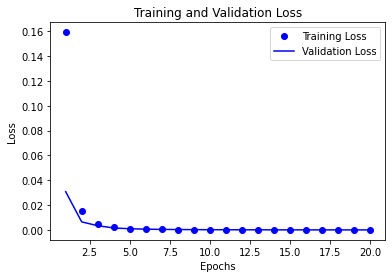

In [32]:
loss = history_dict['loss']
acc = history_dict['acc']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()